<a href="https://colab.research.google.com/github/alisarshad/sharing-github/blob/main/DL_tamrin2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [ ]:
fashion_mn =tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mn.load_data()

In [ ]:
fashion_mn

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
df=pd.DataFrame(train_labels)
df

,0
0,9
1,0
2,0
3,3
4,0
...,...
59995,5
59996,1
59997,3
59998,0


In [ ]:
df[0].unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

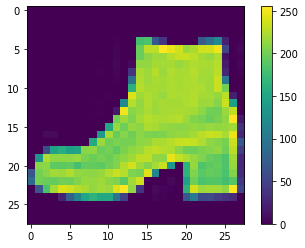

In [ ]:
plt.figure()
plt.imshow(train_images[122])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model =Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           optimizer='adam',
              metrics=['accuracy'] )

In [ ]:
history = model.fit(train_images,train_labels,
          epochs=200, batch_size=128,)



Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


469/469 [==============================] - 14s 10ms/step - loss: 1.2881 - accuracy: 0.6118
Epoch 2/200
469/469 [==============================] - 4s 9ms/step - loss: 0.6007 - accuracy: 0.7845
Epoch 3/200
469/469 [==============================] - 4s 9ms/step - loss: 0.4951 - accuracy: 0.8220
Epoch 4/200
469/469 [==============================] - 4s 10ms/step - loss: 0.4403 - accuracy: 0.8427
Epoch 5/200
469/469 [==============================] - 4s 9ms/step - loss: 0.3947 - accuracy: 0.8606
Epoch 6/200
469/469 [==============================] - 4s 9ms/step - loss: 0.3698 - accuracy: 0.8676
Epoch 7/200
469/469 [==============================] - 4s 9ms/step - loss: 0.3475 - accuracy: 0.8758
Epoch 8/200
469/469 [==============================] - 4s 9ms/step - loss: 0.3269 - accuracy: 0.8838
Epoch 9/200
469/469 [==============================] - 4s 10ms/step - loss: 0.3147 - accuracy: 0.8868
Epoch 10/200
469/469 [==============================] - 4s 9ms/step - loss: 0.3019 - accuracy: 0.89

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 1.6251 - accuracy: 0.8922 - 1s/epoch - 4ms/step

Test accuracy: 0.8921999931335449
